# Demo Image Augmentation

In [1]:
%matplotlib inline
import os
import pickle

os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
)

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from skimage.io import imread
# skimage.io.imshow is deprecated use matplotlib.pyplot.imshow instead
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
#import Tensorflow namespaces

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image


2025-04-09 16:51:16.140429: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-09 16:51:16.151899: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744210276.163695    2390 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744210276.167423    2390 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-09 16:51:16.181146: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
# Inladen van de datasets

training_data = unpickle('./cifar-10/data_batch_1')
test_data = unpickle('./cifar-10/test_batch')


X_train = training_data.get(b'data')
train_labels = training_data.get(b'labels')
X_test = test_data.get(b'data')
test_labels = test_data.get(b'labels')

# Reshape into Tensorflow format (number of images, width, height, color channels)
X_train = X_train.reshape((len(X_train),3,32,32)).transpose(0,2,3,1)
X_test  = X_test.reshape((len(X_test),3,32,32)).transpose(0,2,3,1)

print(X_train.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)


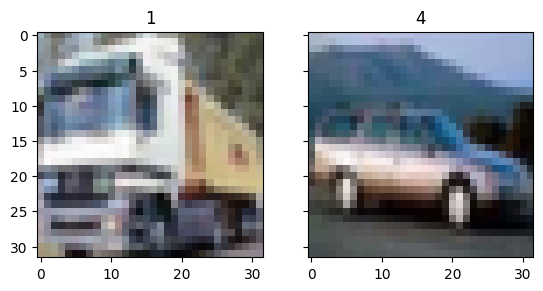

In [4]:
# Toon afbeelding
fig, axes = plt.subplots(1, 2, sharey=True)
axes[0].set_title("1")
axes[0].imshow(X_train[1])
axes[1].set_title("4")
axes[1].imshow(X_train[4])
# plt.axis('off')  # Hide axes
# plt.show()

In [5]:
# Image normalization

# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding van de target labels

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(y_train.shape)

(10000, 10)


In [6]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, validation_data = (X_test,y_test), verbose=1)

/home/sam/howest/howest-dl/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744210281.003049    2390 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3574 MB memory:  -> device: 0, name: NVIDIA RTX A3000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1744210282.794092  424879 service.cc:148] XLA service 0x7f2cac01cfb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744210282.794254  424879 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A3000 Laptop GPU, Compute Capability 8.6
2025-04-09 16:51:22.846289: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744210283.002458  424879 cuda_dnn.cc:529] Loaded cuDNN version 90300


 58/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1522 - loss: 2.2644

I0000 00:00:1744210285.450966  424879 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1975 - loss: 2.1571 - val_accuracy: 0.3748 - val_loss: 1.7829
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3677 - loss: 1.7348 - val_accuracy: 0.4099 - val_loss: 1.6421
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4251 - loss: 1.5922 - val_accuracy: 0.4561 - val_loss: 1.5036
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4628 - loss: 1.4894 - val_accuracy: 0.5021 - val_loss: 1.4091
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4971 - loss: 1.3995 - val_accuracy: 0.5143 - val_loss: 1.3580
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5141 - loss: 1.3366 - val_accuracy: 0.5162 - val_loss: 1.3514
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5445 - loss: 1.2848 - val_accuracy: 0.5453 - val_loss: 1.2824
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5551 - loss: 1.2283 - val_accuracy: 0.551

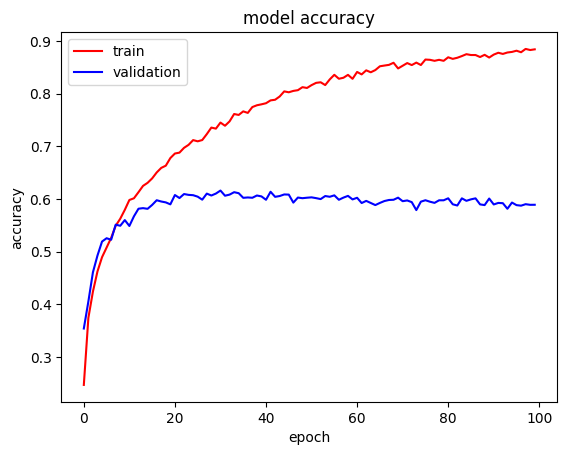

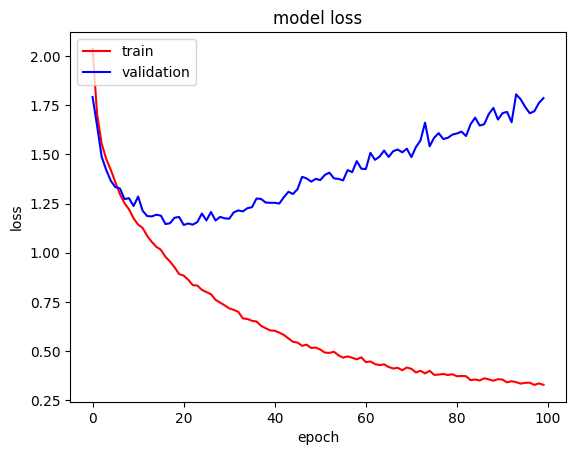

In [7]:
# Plot of the training history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Image augmentation

In [9]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Image augmentation ####

from tensorflow.keras.preprocessing.image import ImageDataGenerator

 
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
horizontal_flip=True, fill_mode="nearest")
 
# train the network
# Het NN weet niet meer hoeveel epochs er moeten uitgevoerd woden, dus moet dit nu aangegeven worden
history_aug = model.fit(
    aug.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data = (X_test,y_test)
)

Epoch 1/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.1485 - loss: 2.2249 - val_accuracy: 0.3380 - val_loss: 1.8613
Epoch 2/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2188 - loss: 1.9291 - val_accuracy: 0.3383 - val_loss: 1.8624
Epoch 3/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.2859 - loss: 1.9056 - val_accuracy: 0.3978 - val_loss: 1.6849
Epoch 4/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2656 - loss: 1.8364 - val_accuracy: 0.3947 - val_loss: 1.6941
Epoch 5/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.3261 - loss: 1.7966 - val_accuracy: 0.4194 - val_loss: 1.6326
Epoch 6/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3125 - loss: 1.7216 - val_accuracy: 0.4268 - val_loss: 1.6187
Epoch 7/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3391 - loss: 1.7491 - val_accuracy: 0.4292 - val_loss: 1.5940
Epoch 8/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4531 - loss: 1.6516 - val_

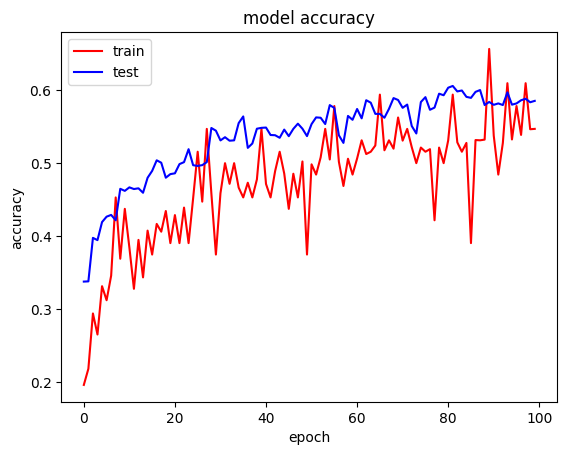

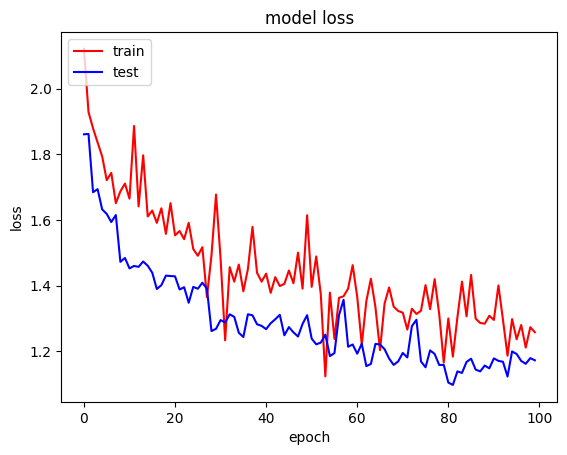

In [11]:
# Plot of the training history

# Accuray 
plt.plot(history_aug.history['accuracy'],'r')
plt.plot(history_aug.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history_aug.history['loss'],'r')
plt.plot(history_aug.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

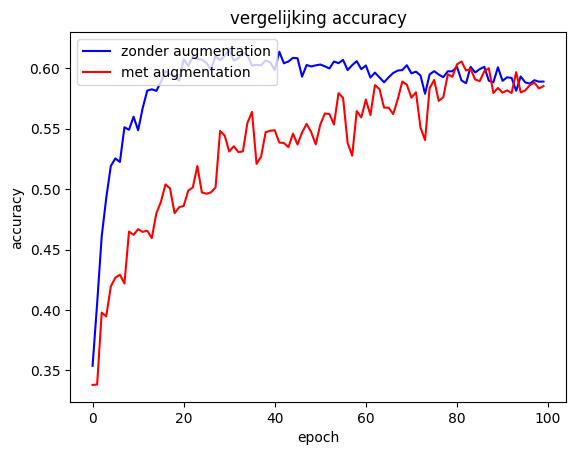

In [12]:
# Vergelijking tussen CNN zonder en met image augmentation

# Accuray 
plt.plot(history.history['val_accuracy'],'b')
plt.plot(history_aug.history['val_accuracy'],'r')
plt.title('vergelijking accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['zonder augmentation', 'met augmentation'], loc='upper left')
plt.show()